<a id=top-page></a>

<h1>
<center>
→ Towards flamelet-like model adaptivity
</center>
</h1>

<h3>
<center>
📄 Optimizing progress variables for ammonia/hydrogen combustion using encoding-decoding networks
</center>
</h3>

<center>
K. Zdybał, J. C. Sutherland, A. Parente, Combustion and Flame (2025)
</center>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#visualize-f-chi">Visualize target QoIs over the $f$-$\chi$ manifold</a></li>
    <li><a href="#MSE">Upload the MSE losses</a></li>
    <li><a href="#cost-statistics">Visualize the cost statistics
    <li><a href="#find-best">Find the best manifold in each of the six networks
    <li><a href="#cost-statistics-ST">Visualize the cost statistics for the PV source term
</a></li>
    

    
</ol>
<p></p>
</div>
<br>

***

#### The user should only modify the `pure_streams` parameter below. Set to `False` to view results corresponding to non-trainable pure stream components (NH$_3$, H$_2$, and O$_2$ are excluded from PV definition). Otherwise set to `True`.

In [1]:
pure_streams = True

***

In [2]:
%run -i imports.py
cmap = cmc.lajolla
%matplotlib inline

Python==3.10.13

numpy==1.26.2
pandas==2.1.3
scipy==1.11.4
scikit-learn==1.3.2
PCAfold==2.2.0


In [3]:
data_type = 'SLF'
data_tag = 'NH3-H2-air-25perc'
target_variables_indices = [9,10,11,26]

%run -i ../scripts/ammonia-Stagni-load-data.py


Using: NO, N2O, NO2, NH2 as target state variables at the decoder output.

24150 observations
29 state variables


In [4]:
power = 4
vertical_shift = 1
penalty_function = 'log-sigma-over-peak'
results_dir = '../results-paper/'

<a id=visualize-f-chi></a>
***

## Visualize target QoIs over the $f$-$\chi$ manifold

[**Go to the top ↑**](#top-page)

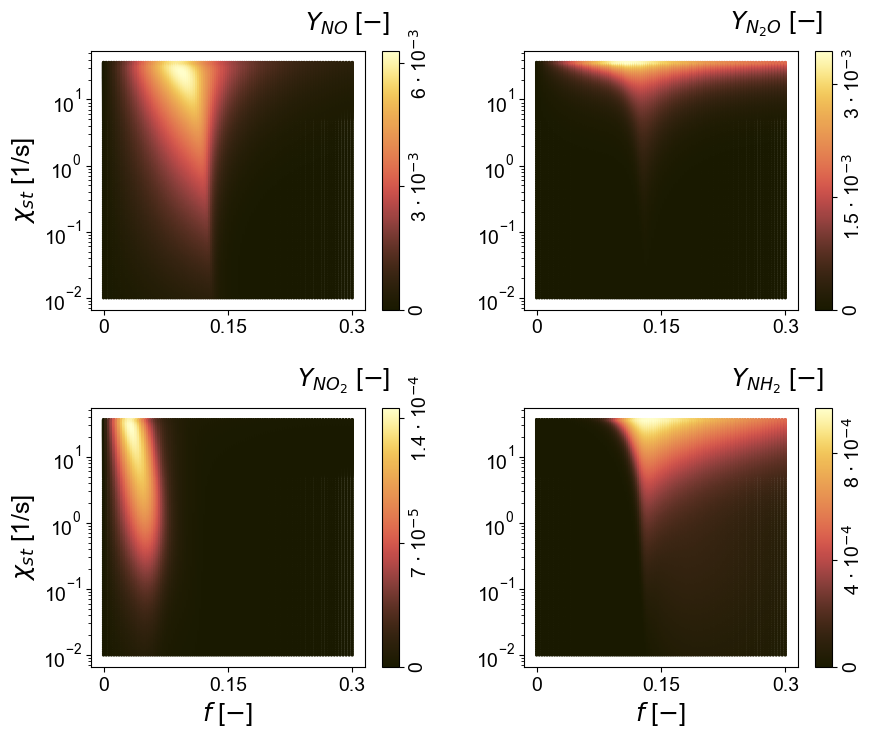

In [5]:
figure = plt.figure(figsize=(10, 8))
spec = figure.add_gridspec(ncols=3, nrows=3, width_ratios=[1,0,1], height_ratios=[1,0.1,1])

fontsize = 18
fontsize_axes = 14
add = 0
s = 2
pad = 15

# Manifolds - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

figure_1 = figure.add_subplot(spec[0,0])
scat = plt.scatter(mf, chi, c=target_variables[:,0], s=s, cmap=cmap, zorder=10)
plt.ylabel('$\chi_{st}$ [1/s]', fontsize=fontsize, rotation=90)
plt.xticks([0,0.15,0.3], ['0', '0.15', '0.3'], fontsize=fontsize_axes)
plt.yscale('log')
plt.yticks(fontsize=fontsize_axes)
cbar = plt.colorbar(scat, aspect=15, ticks=[0,0.003,0.006])
cbar.ax.set_yticklabels(['0', '3 $\cdot$ 10$^{-3}$', '6 $\cdot$ 10$^{-3}$'], rotation=90, verticalalignment='center')
cbar.ax.set_title('$Y_{NO}$ [$-$]', fontsize=fontsize+add, pad=pad, horizontalalignment='right')
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(fontsize_axes)
    
figure_2 = figure.add_subplot(spec[0,2])
scat = plt.scatter(mf, chi, c=target_variables[:,1], s=s, cmap=cmap, zorder=10)
plt.xticks([0,0.15,0.3], ['0', '0.15', '0.3'], fontsize=fontsize_axes)
plt.yscale('log')
plt.yticks(fontsize=fontsize_axes)
cbar = plt.colorbar(scat, aspect=15, ticks=[0,0.0015,0.003])
cbar.ax.set_yticklabels(['0', '1.5 $\cdot$ 10$^{-3}$', '3 $\cdot$ 10$^{-3}$'], rotation=90, verticalalignment='center')
cbar.ax.set_title('$Y_{N_2O}$ [$-$]', fontsize=fontsize+add, pad=pad, horizontalalignment='right')
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(fontsize_axes)
    
figure_3 = figure.add_subplot(spec[2,0])
scat = plt.scatter(mf, chi, c=target_variables[:,2], s=s, cmap=cmap, zorder=10)
plt.ylabel('$\chi_{st}$ [1/s]', fontsize=fontsize, rotation=90)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3], ['0', '0.15', '0.3'], fontsize=fontsize_axes)
plt.yscale('log')
plt.yticks(fontsize=fontsize_axes)
cbar = plt.colorbar(scat, aspect=15, ticks=[0,0.00007,0.00014])
cbar.ax.set_yticklabels(['0', '7 $\cdot$ 10$^{-5}$', '1.4 $\cdot$ 10$^{-4}$'], rotation=90, verticalalignment='center')
cbar.ax.set_title('$Y_{NO_2}$ [$-$]', fontsize=fontsize+add, pad=pad, horizontalalignment='right')
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(fontsize_axes)
    
figure_4 = figure.add_subplot(spec[2,2])
scat = plt.scatter(mf, chi, c=target_variables[:,3], s=s, cmap=cmap, zorder=10)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3], ['0', '0.15', '0.3'], fontsize=fontsize_axes)
plt.yscale('log')
plt.yticks(fontsize=fontsize_axes)
cbar = plt.colorbar(scat, aspect=15, ticks=[0,0.0004,0.0008])
cbar.ax.set_yticklabels(['0', '4 $\cdot$ 10$^{-4}$', '8 $\cdot$ 10$^{-4}$'], rotation=90, verticalalignment='center')
cbar.ax.set_title('$Y_{NH_2}$ [$-$]', fontsize=fontsize+add, pad=pad, horizontalalignment='right')
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(fontsize_axes)

plt.savefig('../paper/targets-in-f-chi-space.png', dpi=500, bbox_inches='tight')

<a id=MSE></a>
***

## Upload the MSE losses

[**Go to the top ↑**](#top-page)

In [6]:
random_seed = 0

In [7]:
target = 'NO'

In [8]:
training_losses_across_epochs = pd.read_csv(results_dir + 'f-PV-' + pure_streams_prefix + '-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-' + target + '-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-MSE-training-losses-rs-' + str(random_seed) + '.csv', sep = ',', header=None).to_numpy()

In [9]:
CMP_training_losses_across_epochs = pd.read_csv(results_dir + 'f-PV-' + pure_streams_prefix + '-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-' + target + '-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-MSE-validation-losses-rs-' + str(random_seed) + '.csv', sep = ',', header=None).to_numpy()

Text(0, 0.5, 'MSE loss')

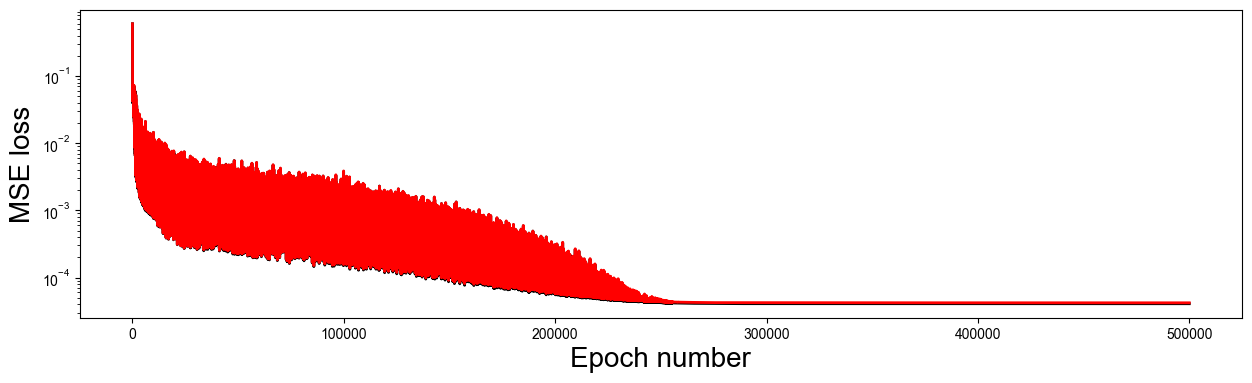

In [10]:
fig = plt.figure(figsize=(15,4))
y = np.arange(0,training_losses_across_epochs.shape[0],1)
plt.semilogy(y, training_losses_across_epochs, lw=2, c='k')
plt.semilogy(y, CMP_training_losses_across_epochs, lw=2, c='r')
plt.xlabel('Epoch number', fontsize=20)
plt.ylabel('MSE loss', fontsize=20)

<a id=cost-statistics></a>
***

## Visualize the cost statistics

[**Go to the top ↑**](#top-page)

Cost for representing targetted species NO, N$_2$O, NO$_2$, NH$_2$, all 4, none 4, with various manifolds:

In [11]:
random_seeds_list = [i for i in range(0,20)]

In [12]:
def populate_costs(target):

    matrix = np.zeros((len(random_seeds_list), 5))
    
    for random_seed in random_seeds_list:
        
        variance_data = pickle.load(open(results_dir + 'f-PV-' + pure_streams_prefix + '-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH' + target + '-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-VD-for-T-H2-H-O2-O-H2O-OH-H2O2-NO-N2O-NO2-NH2-PV-source-rs-' + str(random_seed) + '.pkl', 'rb'))
        
        costs = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                      penalty_function=penalty_function,
                                                                      norm=None,
                                                                      power=power,
                                                                      vertical_shift=vertical_shift,
                                                                      integrate_to_peak=False)

        matrix[random_seed,:] = costs[8:13]
        
    names = variance_data.variable_names[8:13]

    return names, matrix

In [13]:
names, costs_targetting_NO = populate_costs('-NO')
_, costs_targetting_N2O = populate_costs('-N2O')
_, costs_targetting_NO2 = populate_costs('-NO2')
_, costs_targetting_NH2 = populate_costs('-NH2')
_, costs_targetting_all_NOx = populate_costs('-NO-N2O-NO2-NH2')
_, costs_targetting_none_NOx = populate_costs('')

In [14]:
names

['NO', 'N2O', 'NO2', 'NH2', 'PV-source']

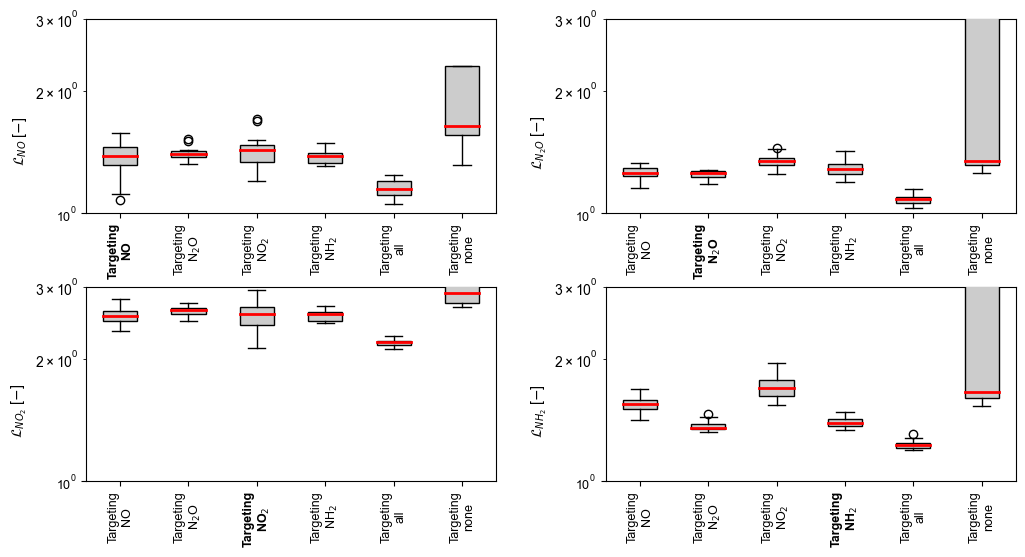

In [15]:
figure = plt.figure(figsize=(12, 6))
spec = figure.add_gridspec(ncols=3, nrows=3, width_ratios=[1,0,1], height_ratios=[1,0.1,1])
label_names = ['Targeting\nNO', 'Targeting\nN$_2$O', 'Targeting\nNO$_2$', 'Targeting\nNH$_2$', 'Targeting\nall', 'Targeting\nnone']

specs_list = [[0,0], [0,2], [2,0], [2,2]]

for i in [0,1,2,3]:

    fig = figure.add_subplot(spec[specs_list[i][0], specs_list[i][1]])

    cost_representing_i = np.hstack((costs_targetting_NO[:,i][:,None],
                                     costs_targetting_N2O[:,i][:,None],
                                     costs_targetting_NO2[:,i][:,None],
                                     costs_targetting_NH2[:,i][:,None],
                                     costs_targetting_all_NOx[:,i][:,None],
                                     costs_targetting_none_NOx[:,i][:,None],))
    

    xrange = [i for i in range(1,7)]

    box_plot = plt.boxplot(cost_representing_i, zorder=20, boxprops=dict(facecolor='#cccccc'), patch_artist=True)
    
    for median in box_plot['medians']:
        median.set_color('red')
        median.set_linewidth(2)
    
    names_for_label = ['NO', 'N_2O', 'NO_2', 'NH_2']

    plt.ylabel('$\mathcal{L}_{' + names_for_label[i] + '}$ [$-$]', fontsize=10, horizontalalignment='right');
    plt.yscale('log')
    plt.ylim([1,3])
    fig.get_xticklabels()[i].set_weight("bold")
    plt.xticks(xrange, label_names, rotation=90, fontsize=9, zorder=10);
    plt.yticks(fontsize=9)
    
plt.savefig('../paper/' + pure_streams_prefix + '-cost-for-representing-NO-N2O-NO2-NH2.pdf', dpi=500, bbox_inches='tight')

<a id=find-best></a>
***

## Find the best manifold in each of the six networks

[**Go to the top ↑**](#top-page)

In [16]:
idx_best_NO_representation_with_NO_target, = np.where(costs_targetting_NO[:,0]==np.min(costs_targetting_NO[:,0]))
idx_best_NO_representation_with_NO_target = idx_best_NO_representation_with_NO_target[0]
print(idx_best_NO_representation_with_NO_target)

model_weights_filename = results_dir + 'f-PV-' + pure_streams_prefix + '-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-best-model-weights-rs-' + str(idx_best_NO_representation_with_NO_target) + '.h5'

hf = h5py.File(model_weights_filename, 'r')
best_basis = np.array(hf.get('0'))
hf.close()

PV_NO_target = np.dot(state_space[:,1::], best_basis)
PV_source_NO_target = np.dot(state_space_sources[:,1::], best_basis)

10


In [17]:
idx_best_N2O_representation_with_N2O_target, = np.where(costs_targetting_N2O[:,0]==np.min(costs_targetting_N2O[:,0]))
idx_best_N2O_representation_with_N2O_target = idx_best_N2O_representation_with_N2O_target[0]
print(idx_best_N2O_representation_with_N2O_target)

model_weights_filename = results_dir + 'f-PV-' + pure_streams_prefix + '-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-N2O-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-best-model-weights-rs-' + str(idx_best_N2O_representation_with_N2O_target) + '.h5'

hf = h5py.File(model_weights_filename, 'r')
best_basis = np.array(hf.get('0'))
hf.close()

PV_N2O_target = np.dot(state_space[:,1::], best_basis)
PV_source_N2O_target = np.dot(state_space_sources[:,1::], best_basis)

13


In [18]:
idx_best_NO2_representation_with_NO2_target, = np.where(costs_targetting_NO2[:,0]==np.min(costs_targetting_NO2[:,0]))
idx_best_NO2_representation_with_NO2_target = idx_best_NO2_representation_with_NO2_target[0]
print(idx_best_NO2_representation_with_NO2_target)

model_weights_filename = results_dir + 'f-PV-' + pure_streams_prefix + '-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NO2-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-best-model-weights-rs-' + str(idx_best_NO2_representation_with_NO2_target) + '.h5'

hf = h5py.File(model_weights_filename, 'r')
best_basis = np.array(hf.get('0'))
hf.close()

PV_NO2_target = np.dot(state_space[:,1::], best_basis)
PV_source_NO2_target = np.dot(state_space_sources[:,1::], best_basis)

16


In [19]:
idx_best_NH2_representation_with_NH2_target, = np.where(costs_targetting_NH2[:,0]==np.min(costs_targetting_NH2[:,0]))
idx_best_NH2_representation_with_NH2_target = idx_best_NH2_representation_with_NH2_target[0]
print(idx_best_NH2_representation_with_NH2_target)

model_weights_filename = results_dir + 'f-PV-' + pure_streams_prefix + '-SLF-NH3-H2-air-25perc-target-T-H2-O2-H2O-OH-NH2-RandomNormal-e-500000-CD-300000-lr-0.01-alr-0.001-scale-none-darch-0-10-10-rho-0.9-mom-0.5-momcent-no-best-model-weights-rs-' + str(idx_best_NH2_representation_with_NH2_target) + '.h5'

hf = h5py.File(model_weights_filename, 'r')
best_basis = np.array(hf.get('0'))
hf.close()

PV_NH2_target = np.dot(state_space[:,1::], best_basis)
PV_source_NH2_target = np.dot(state_space_sources[:,1::], best_basis)

0


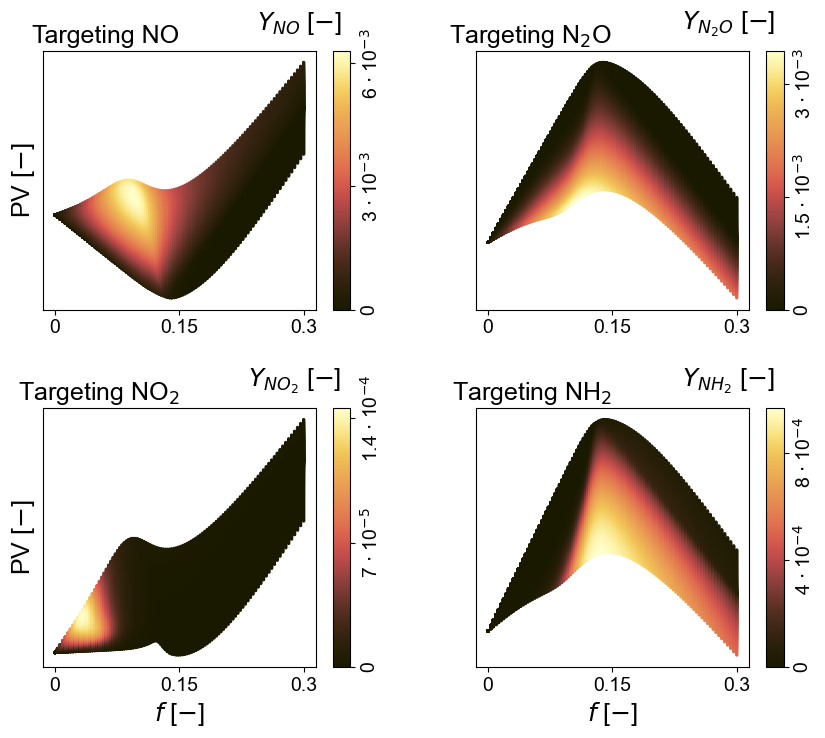

In [20]:
figure = plt.figure(figsize=(10, 8))
spec = figure.add_gridspec(ncols=3, nrows=3, width_ratios=[1,0,1], height_ratios=[1,0.1,1])

fontsize = 18
fontsize_axes = 14
add = 0
s = 2
pad = 15

# Manifolds - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

figure_1 = figure.add_subplot(spec[0,0])
scat = plt.scatter(mf, PV_NO_target, c=target_variables[:,0], s=s, cmap=cmap, zorder=10)
plt.ylabel('PV [$-$]', fontsize=fontsize, rotation=90)
plt.xticks([0,0.15,0.3], ['0', '0.15', '0.3'], fontsize=fontsize_axes)
plt.yticks([], fontsize=fontsize_axes)
plt.title('Targeting NO', fontsize=fontsize, horizontalalignment='right')
cbar = plt.colorbar(scat, aspect=15, ticks=[0,0.003,0.006])
cbar.ax.set_yticklabels(['0', '3 $\cdot$ 10$^{-3}$', '6 $\cdot$ 10$^{-3}$'], rotation=90, verticalalignment='center')
cbar.ax.set_title('$Y_{NO}$ [$-$]', fontsize=fontsize+add, pad=pad, horizontalalignment='right')
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(fontsize_axes)
    
figure_2 = figure.add_subplot(spec[0,2])
scat = plt.scatter(mf, -PV_N2O_target, c=target_variables[:,1], s=s, cmap=cmap, zorder=10)
plt.xticks([0,0.15,0.3], ['0', '0.15', '0.3'], fontsize=fontsize_axes)
plt.yticks([], fontsize=fontsize_axes)
plt.title('Targeting N$_2$O', fontsize=fontsize, horizontalalignment='right')
cbar = plt.colorbar(scat, aspect=15, ticks=[0,0.0015,0.003])
cbar.ax.set_yticklabels(['0', '1.5 $\cdot$ 10$^{-3}$', '3 $\cdot$ 10$^{-3}$'], rotation=90, verticalalignment='center')
cbar.ax.set_title('$Y_{N_2O}$ [$-$]', fontsize=fontsize+add, pad=pad, horizontalalignment='right')
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(fontsize_axes)
    
figure_3 = figure.add_subplot(spec[2,0])
scat = plt.scatter(mf, PV_NO2_target, c=target_variables[:,2], s=s, cmap=cmap, zorder=10)
plt.ylabel('PV [$-$]', fontsize=fontsize, rotation=90)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3], ['0', '0.15', '0.3'], fontsize=fontsize_axes)
plt.yticks([], fontsize=fontsize_axes)
plt.title('Targeting NO$_2$', fontsize=fontsize, horizontalalignment='right')
cbar = plt.colorbar(scat, aspect=15, ticks=[0,0.00007,0.00014])
cbar.ax.set_yticklabels(['0', '7 $\cdot$ 10$^{-5}$', '1.4 $\cdot$ 10$^{-4}$'], rotation=90, verticalalignment='center')
cbar.ax.set_title('$Y_{NO_2}$ [$-$]', fontsize=fontsize+add, pad=pad, horizontalalignment='right')
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(fontsize_axes)
    
figure_4 = figure.add_subplot(spec[2,2])
scat = plt.scatter(mf, -PV_NH2_target, c=target_variables[:,3], s=s, cmap=cmap, zorder=10)
plt.xlabel('$f$ [$-$]', fontsize=fontsize)
plt.xticks([0,0.15,0.3], ['0', '0.15', '0.3'], fontsize=fontsize_axes)
plt.yticks([], fontsize=fontsize_axes)
plt.title('Targeting NH$_2$', fontsize=fontsize, horizontalalignment='right')
cbar = plt.colorbar(scat, aspect=15, ticks=[0,0.0004,0.0008])
cbar.ax.set_yticklabels(['0', '4 $\cdot$ 10$^{-4}$', '8 $\cdot$ 10$^{-4}$'], rotation=90, verticalalignment='center')
cbar.ax.set_title('$Y_{NH_2}$ [$-$]', fontsize=fontsize+add, pad=pad, horizontalalignment='right')
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(fontsize_axes)

plt.savefig('../paper/' + pure_streams_prefix + '-targets-in-f-optimized-PV-space.png', dpi=500, bbox_inches='tight')

<a id=cost-statistics-ST></a>
***

## Visualize the cost statistics for the PV source term

[**Go to the top ↑**](#top-page)

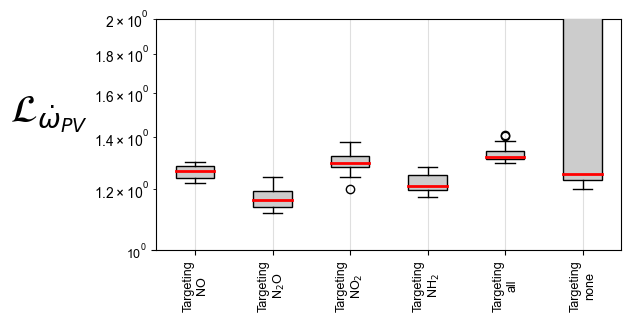

In [21]:
fig = plt.figure(figsize=(6,3))

costs_matrix_PV_source = np.hstack((costs_targetting_NO[:,-1][:,None],
                         costs_targetting_N2O[:,-1][:,None],
                         costs_targetting_NO2[:,-1][:,None],
                         costs_targetting_NH2[:,-1][:,None],
                         costs_targetting_all_NOx[:,-1][:,None],
                         costs_targetting_none_NOx[:,-1][:,None]))

box_plot = plt.boxplot(costs_matrix_PV_source, zorder=20, boxprops=dict(facecolor='#cccccc'), patch_artist=True)

plt.yscale('log')
plt.grid(alpha=0.4, zorder=0)
plt.ylabel('$\mathcal{L}_{\dot{\omega}_{PV}}$', fontsize=28, rotation=0, horizontalalignment='right')
plt.xticks(xrange, label_names, rotation=90, fontsize=9, zorder=10);
plt.yticks(fontsize=9)
plt.ylim([1,2])

for median in box_plot['medians']:
    median.set_color('red')
    median.set_linewidth(2)

plt.savefig('../paper/' + pure_streams_prefix + '-cost-for-representing-PV-source.pdf', dpi=500, bbox_inches='tight')

***

© K. Zdybał, J. C. Sutherland, A. Parente, Combustion and Flame (2025)